In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import time
import copy
import scipy.stats as st
import datetime as dt
from pprint import pprint
import reverse_geocoder as rg
from config import gkey
gmaps.configure(api_key=gkey)

In [81]:
#Earthquakes in US during the year 1986
quakes_all_8489=pd.read_csv("output_data/quakes_all_8489.csv")
quakes_us_8489=quakes_all_8489.loc[quakes_all_8489['Country']=='US']

quakes_8489= copy.deepcopy(quakes_us_8489)
quakes_8489['Date']=pd.to_datetime(quakes_us_8489['Time']).dt.date
quakes_8489['Date'] = quakes_8489['Date'].astype('datetime64')
quakes_df = quakes_8489[(quakes_8489['Date'] > '1986-01-01') & (quakes_8489['Date']< '1987-01-01')]
print(len(quakes_df))
quakes_df.head()

171


,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country,Date
3567,51.553000,-173.109,33.000,5.6,482,"Andreanof Islands, Aleutian Islands, Alaska",1986-01-18 01:59:01.650,1,18,1986,US,1986-01-18
3589,36.804333,-121.285,8.153,5.5,465,Central California,1986-01-26 19:20:50.950,1,26,1986,US,1986-01-26
3605,43.601000,-127.339,10.000,5.3,432,off the coast of Oregon,1986-01-30 07:15:33.500,1,30,1986,US,1986-01-30
3612,41.650000,-81.162,10.000,5.0,385,Ohio,1986-01-31 16:46:43.330,1,31,1986,US,1986-01-31
3628,67.898000,-155.994,33.000,5.1,400,northern Alaska,1986-02-06 15:14:58.360,2,6,1986,US,1986-02-06


In [82]:
# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations and convert magnitude to float
locations = quakes_df[["Lat", "Lng"]]
magnitude = quakes_df["Mag"].astype(float)


# Using the template add the earthquake marks to the gmap
info_box_template = """
<dl>
<dt>Place</dt><dd>{Place}</dd>
<dt>Mag</dt><dd>{Mag}</dd>
</dl>
"""
# Store the DataFrame Row
mod_quake_info = [info_box_template.format(**row) for index, row in quakes_df.iterrows()]

In [89]:
print("Quakes during the year 1986")
fig = gmaps.figure()

# Create marker layer
markers = gmaps.marker_layer(locations, info_box_content=mod_quake_info)

# Add the layer to the map
fig.add_layer(markers)

# Display figure
fig

Quakes during the year 1986


Figure(layout=FigureLayout(height='420px'))

In [87]:
# Drill down into data to see if there is a pattern 
quakes_df = quakes_8489[(quakes_8489['Date'] > '1986-04-20') & (quakes_8489['Date']< '1986-05-15')]
quakes_df.groupby('Place').count()


,Lat,Lng,Depth,Mag,Sig,Time,Month,Day,Year,Country,Date
Place,,,,,,,,,,,
"Andreanof Islands, Aleutian Islands, Alaska",74,74,74,74,74,74,74,74,74,74,74
"Hawaii region, Hawaii",1,1,1,1,1,1,1,1,1,1,1


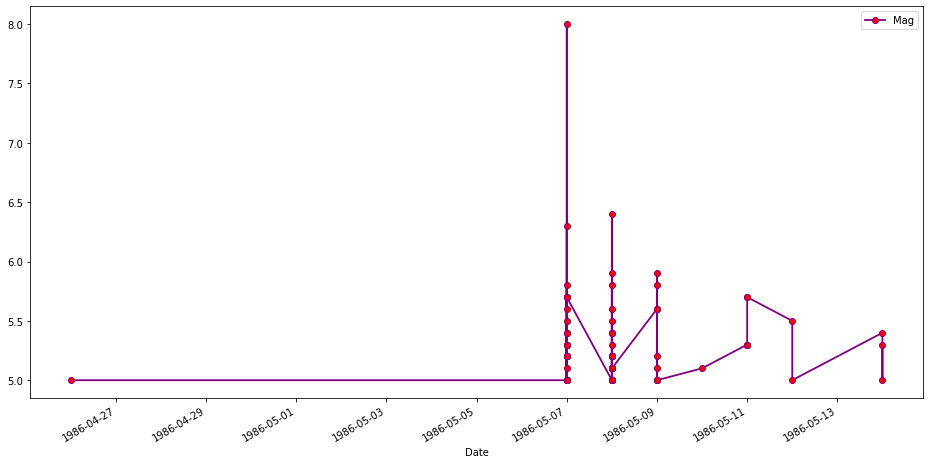

In [63]:
columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
# quakes_df.loc[quakes_df["Country"] == "US",
#                     columns].set_index('Date').plot(marker='.',
#                                                     ms = 7, mfc = 'r',
#                                                     linewidth=0.7, 
#                                                     color='purple')
quakes_df[['Date', 'Mag']].set_index('Date').plot(figsize=(16,8),
                                     marker='.',
                                     ms = 12, mfc = 'r',
                                     linewidth=1.8, 
                                     color='purple')
plt.show()

In [78]:
quakes_df = quakes_8489[(quakes_8489['Date'] > '1986-05-06') & (quakes_8489['Date']< '1986-05-15')]
quakes_df.groupby('Place').count()


,Lat,Lng,Depth,Mag,Sig,Time,Month,Day,Year,Country,Date
Place,,,,,,,,,,,
"Andreanof Islands, Aleutian Islands, Alaska",74,74,74,74,74,74,74,74,74,74,74


Was there a series of quakes preceding the big one. Looks like not. 
The interesting facts : 
      - Between May 7 and May 15 of 1986 there were 74 quakes. 
      - on May 7 1986 alone there were 23 quakes of magnitude 5.0+ on  Andreanof Islands,  Aleutian Islands, Alaska. 
      - The largest of the quakes that hit on May 07 1986 is of magnitude 8.0

The Aleutian arc is a seismically active region, evidenced by the many moderate to large earthquakes occurring each year.
Since 1900, this region has hosted twelve large earthquakes (M>7.5) including the May 7, 1986 M8.0 Andreanof Islands,
the June 10, 1996 M7.9 Andreanof Islands, and the November 17, 2003 M7.8 Rat Islands earthquakes.

Source:
https://earthquake.usgs.gov/earthquakes/eventpage/official19570309142233_30/region-info

In [59]:
eq_df = quakes_8489.loc[quakes_8489['Date'] == '1986-05-07']
eq_df


,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country,Date
4007,51.360,-174.716,33.0,5.0,385,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 20:43:11.090,5,7,1986,US,1986-05-07
4008,51.384,-174.809,22.1,6.3,611,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 20:43:31.260,5,7,1986,US,1986-05-07
4009,51.324,-174.844,33.0,5.0,385,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 21:23:13.160,5,7,1986,US,1986-05-07
4010,51.520,-174.776,33.0,8.0,985,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 22:47:10.870,5,7,1986,US,1986-05-07
4011,51.500,-174.800,33.0,5.6,482,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 22:55:05.000,5,7,1986,US,1986-05-07
4012,51.500,-174.800,33.0,5.7,500,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 22:57:43.000,5,7,1986,US,1986-05-07
4013,51.500,-174.800,33.0,5.2,416,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 23:00:41.000,5,7,1986,US,1986-05-07
4014,51.500,-174.800,33.0,5.3,432,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 23:04:52.000,5,7,1986,US,1986-05-07
4015,51.500,-174.800,33.0,5.0,385,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 23:06:38.000,5,7,1986,US,1986-05-07
4016,51.500,-174.800,33.0,5.5,465,"Andreanof Islands, Aleutian Islands, Alaska",1986-05-07 23:07:45.000,5,7,1986,US,1986-05-07
